В цьому наборі завдань закріпимо те, що було на лекції з Computer Vision.

# Computer Vision with PyTorch Excercises. Solution


## 1. Наведіть 3 галузі промисловості, де комп'ютерний зір використовується сьогодні (можна згадати з лекції, або провести міні-рісерч).

1. Виробництво та Промислова Автоматизація:

Контроль якості: Автоматична інспекція продукції для виявлення дефектів, тріщин або неправильного складання (наприклад, на конвеєрних лініях).

2. Транспорт:

Автономні транспортні засоби: Розпізнавання та відстеження об'єктів (пішоходів, дорожніх знаків, інших машин) для безпечної навігації.

3. Медицина:

Аналіз медичних зображень: Допомога в діагностиці шляхом виявлення патологій (наприклад, пухлин) на рентгенівських знімках, МРТ та КТ.

## 2. Виділіть 20 хвилин аби ознайомитись та переглянути сайт [CNN Explainer](https://poloclub.github.io/cnn-explainer/).

* Завантажте власне будь-яке зображення за допомогою кнопки Upload" на сайті та подивіться, що відбувається на кожному шарі CNN, коли ваше зображення проходить через нього.

Напишіть 3 пункти, що ви дізнались після цієї вправи?

1. CNN вчиться поетапно: спочатку детектуються лише прості лінії (вертикальні, горизонтальні) та кольорові плями. Потім з'єднуються ці лінії у прості фігури (кути, текстури) та складаються ці фігури у складні частини об'єкта (наприклад, "обличчя", "колесо").
2. Для чого потрібне "стиснення" (Pooling): це як зменшення фотографії без втрати головного змісту. Воно допомагає комп'ютеру швидше працювати і гарантує, що він розпізнає об'єкт, навіть якщо той трохи змістився на знімку.
3. Останній крок - це голосування. Комп'ютер бере всі знайдені ознаки і оцінює ступінь впевненості у тому ща це той чи інший об'єкт.

## 3. Завантажте навчальні та тестові набори даних [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST).

MNIST - базовий набір даних для задач Computer Vision. Часто використовується для навчання.

- Виведіть, скільки елементів в кожному наборі.
- Покажіть формат (розмірності) кожної картинки.
- Виведіть, які класи представлені в цьому наборі даних.

In [3]:
# pip install torchvision

In [30]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from timeit import default_timer as timer
import copy
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [6]:
# 1. Load the MNIST Dataset
# Training set (train=True)
train_dataset = datasets.MNIST(
    root='./data', 
    train=True, 
    download=True, 
    transform=transforms.ToTensor()
)

# Test set (train=False)
test_dataset = datasets.MNIST(
    root='./data', 
    train=False, 
    download=True, 
    transform=transforms.ToTensor()
)

# 2. Display Dataset Information

print("--- Dataset Sizes ---")
print(f"Number of elements in the Training set: {len(train_dataset)}")
print(f"Number of elements in the Test set: {len(test_dataset)}")
print("-" * 30)

# Get the first item to inspect the image dimensions
first_image, first_label = train_dataset[0]

# Image dimensions (Shape)
image_shape = first_image.shape

print("--- Image Format (Dimensions) ---")
print(f"Shape of a single image (Tensor): {image_shape}")
print(f"Dimension breakdown: {image_shape[0]} channel (grayscale), {image_shape[1]}x{image_shape[2]} pixels")
print("-" * 30)

# Classes represented in the dataset (digits 0-9)
mnist_classes = list(range(10)) 

print("--- Represented Classes ---")
print(f"Classes: {mnist_classes}")
print(f"Description: The dataset contains handwritten digits from 0 to 9.")
print("-" * 30)

100%|██████████████████████████████████████| 9.91M/9.91M [00:00<00:00, 11.0MB/s]
100%|███████████████████████████████████████| 28.9k/28.9k [00:00<00:00, 312kB/s]
100%|██████████████████████████████████████| 1.65M/1.65M [00:00<00:00, 2.84MB/s]
100%|██████████████████████████████████████| 4.54k/4.54k [00:00<00:00, 3.35MB/s]

--- Dataset Sizes ---
Number of elements in the Training set: 60000
Number of elements in the Test set: 10000
------------------------------
--- Image Format (Dimensions) ---
Shape of a single image (Tensor): torch.Size([1, 28, 28])
Dimension breakdown: 1 channel (grayscale), 28x28 pixels
------------------------------
--- Represented Classes ---
Classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Description: The dataset contains handwritten digits from 0 to 9.
------------------------------


## 4. Візуалізуйте щонайменше 5 різних зразків з навчального набору даних MNIST.

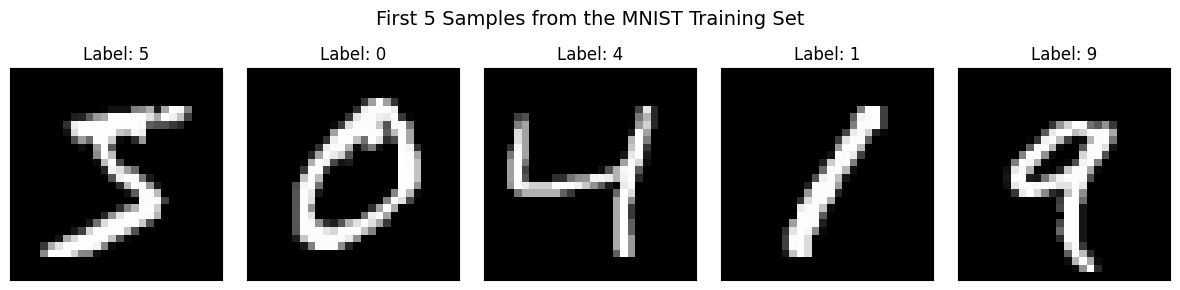

In [8]:
num_samples_to_show = 5

fig, axes = plt.subplots(1, num_samples_to_show, figsize=(12, 3))
plt.suptitle(f"First {num_samples_to_show} Samples from the MNIST Training Set", fontsize=14)

for i in range(num_samples_to_show):
    image, label = train_dataset[i]
    
    axes[i].imshow(image.squeeze().numpy(), cmap="gray") 
    
    axes[i].set_title(f"Label: {label}")
    axes[i].set_xticks([])
    axes[i].set_yticks([])

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

## 5. Перетворіть навчальні та тестові набори даних MNIST у data loaders за допомогою `torch.utils.data.DataLoader`, встановіть `batch_size=32`.
- Покажіть, яку форму даних вертають дата лоадери.

In [10]:
BATCH_SIZE = 32

# 2. Create DataLoaders
# DataLoader for the training set (shuffle=True for better training)
train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True # Shuffle data at the beginning of each epoch
)

# DataLoader for the test set (shuffle=False is typical)
test_dataloader = DataLoader(
    dataset=test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False # No need to shuffle test data
)

In [11]:
# 3. Check the shape of the data returned by the DataLoaders

train_features, train_labels = next(iter(train_dataloader))

print("--- DataLoaders successfully created with BATCH_SIZE = 32 ---")
print(f"Total number of batches in Training DataLoader: {len(train_dataloader)}")
print(f"Total number of batches in Test DataLoader: {len(test_dataloader)}")
print("-" * 60)

print("--- Shape of data returned by the Training DataLoader (One Batch) ---")
# The batch size is the first dimension
print(f"Image Batch Shape: {train_features.shape}")
print(f"Label Batch Shape: {train_labels.shape}")
print("-" * 60)

print("--- Explanation of the shapes ---")
print(f"Image Batch Shape: {train_features.shape}")
print(f"  - 32: The batch size (number of images in this pack)")
print(f"  - 1: The number of color channels (1 for grayscale)")
print(f"  - 28: The image height (28 pixels)")
print(f"  - 28: The image width (28 pixels)")

--- DataLoaders successfully created with BATCH_SIZE = 32 ---
Total number of batches in Training DataLoader: 1875
Total number of batches in Test DataLoader: 313
------------------------------------------------------------
--- Shape of data returned by the Training DataLoader (One Batch) ---
Image Batch Shape: torch.Size([32, 1, 28, 28])
Label Batch Shape: torch.Size([32])
------------------------------------------------------------
--- Explanation of the shapes ---
Image Batch Shape: torch.Size([32, 1, 28, 28])
  - 32: The batch size (number of images in this pack)
  - 1: The number of color channels (1 for grayscale)
  - 28: The image height (28 pixels)
  - 28: The image width (28 pixels)


## 6. Відтворіть `ModelV2`, яку ми розглядали на лекції
Це до слова та сама модель з [сайту CNN Explainer](https://poloclub.github.io/cnn-explainer/), також відома як TinyVGG і вона здатна навчатися на наборі даних MNIST.

Напишіть клас моделі.

In [13]:
class TinyVGG_ModelV2(nn.Module):
    """
    CNN architecture (TinyVGG) similar to the one presented in CNN Explainer,
    optimized for 28x28 grayscale images like MNIST.
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        """
        Initializes the ModelV2 (TinyVGG) layers.

        Args:
            input_shape (int): Number of input channels (1 for grayscale MNIST).
            hidden_units (int): Number of filters/feature maps in the hidden layers.
            output_shape (int): Number of output classes (10 for digits 0-9).
        """
        super().__init__()
        
        # --- Feature Extractor (Convolutional Layers) ---
        # The main part of the network that extracts features from the image.
        self.conv_block_1 = nn.Sequential(
            # 1. Convolutional Layer 1
            # Input: [Batch_Size, 1, 28, 28] -> Output: [Batch_Size, hidden_units, 28, 28]
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, 
                      stride=1, 
                      padding=1), # Padding=1 maintains the spatial size (28x28)
            nn.ReLU(),
            
            # 2. Max Pooling Layer 1
            # Input: [Batch_Size, hidden_units, 28, 28] -> Output: [Batch_Size, hidden_units, 14, 14]
            nn.MaxPool2d(kernel_size=2, 
                         stride=2) # Stride=2 halves the spatial size (28/2 = 14)
        )
        
        self.conv_block_2 = nn.Sequential(
            # 3. Convolutional Layer 2
            # Input: [Batch_Size, hidden_units, 14, 14] -> Output: [Batch_Size, hidden_units, 14, 14]
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units, 
                      kernel_size=3, 
                      stride=1, 
                      padding=1),
            nn.ReLU(),
            
            # 4. Max Pooling Layer 2
            # Input: [Batch_Size, hidden_units, 14, 14] -> Output: [Batch_Size, hidden_units, 7, 7]
            nn.MaxPool2d(kernel_size=2, 
                         stride=2) # Stride=2 halves the spatial size (14/2 = 7)
        )
        
        # --- Classifier (Fully Connected Layers) ---
        # Converts the extracted features into class probabilities.
        self.classifier = nn.Sequential(
            # Flatten the output from the last pooling layer: [Batch, hidden_units, 7, 7] -> [Batch, hidden_units * 7 * 7]
            nn.Flatten(),
            
            # 5. Fully Connected Layer 1
            # Input features = hidden_units * 7 * 7
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
            
            # Note: We usually don't include Softmax/LogSoftmax here.
            # The loss function (e.g., CrossEntropyLoss) handles the softmax internally.
        )
    
    def forward(self, x: torch.Tensor):
        """
        Performs the forward pass through the network.
        """
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x



In [14]:
# Define hyperparameters
INPUT_CHANNELS = 1     # Grayscale MNIST image
HIDDEN_FEATURES = 10   # Example: 10 feature maps in the conv layers
OUTPUT_CLASSES = 10    # Digits 0 through 9

# Initialize the model
model_v2 = TinyVGG_ModelV2(
    input_shape=INPUT_CHANNELS,
    hidden_units=HIDDEN_FEATURES,
    output_shape=OUTPUT_CLASSES
)

print("Model Architecture (TinyVGG / ModelV2):")
print(model_v2)

Model Architecture (TinyVGG / ModelV2):
TinyVGG_ModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)


In [15]:
# Simulate a forward pass with a dummy batch (32 images, 1 channel, 28x28)
dummy_batch = torch.randn(32, INPUT_CHANNELS, 28, 28) 
output_logits = model_v2(dummy_batch)

print("\n--- Output Test ---")
print(f"Input batch shape: {dummy_batch.shape}")
print(f"Output logits shape: {output_logits.shape} (Matches [Batch Size, Number of Classes])")


--- Output Test ---
Input batch shape: torch.Size([32, 1, 28, 28])
Output logits shape: torch.Size([32, 10]) (Matches [Batch Size, Number of Classes])


## 7. Навчіть модель, яку ви побудували в попередній вправі, протягом 5 епох на CPU та GPU і подивіться, скільки часу це займе в кожному з варіантів.

In [17]:
# Check for CUDA (GPU) availability
if torch.cuda.is_available():
    print("CUDA is available. Running GPU benchmark.")
    # Set to synchronize for accurate GPU timing
    torch.backends.cudnn.benchmark = True
    GPU_DEVICE = "cuda"
else:
    print("CUDA not available. GPU benchmark will be skipped.")
    GPU_DEVICE = None

CPU_DEVICE = "cpu"
EPOCHS = 5
BATCH_SIZE = 32
LEARNING_RATE = 0.001
HIDDEN_UNITS = 10
INPUT_CHANNELS = 1
OUTPUT_CLASSES = 10 

CUDA not available. GPU benchmark will be skipped.


In [18]:
def train_model(model: nn.Module, 
                dataloader: DataLoader, 
                loss_fn: nn.Module, 
                optimizer: torch.optim.Optimizer, 
                epochs: int, 
                device: str):
    """Performs model training for specified epochs and returns total time."""
    
    # Move model to the target device
    model.to(device)
    
    # Synchronization before starting the timer (essential for GPU timing)
    if device == "cuda":
        torch.cuda.synchronize()

    total_time_start = timer()
    
    print(f"\n--- Starting training on {device.upper()} for {epochs} epochs ---")
    
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for X, y in dataloader:
            # Move data to the target device
            X, y = X.to(device), y.to(device)

            # Forward pass
            loss = loss_fn(model(X), y)
            train_loss += loss.item()

            # Backpropagation and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        # Calculate average loss per epoch
        train_loss /= len(dataloader)
        print(f"Epoch: {epoch+1}/{epochs} | Train Loss: {train_loss:.4f}")
        
    # Synchronization before stopping the timer
    if device == "cuda":
        torch.cuda.synchronize()
        
    total_time_end = timer()
    return total_time_end - total_time_start

In [19]:
# --- 5. EXECUTE EXPERIMENTS ---
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

# --- CPU Run ---
model_cpu = TinyVGG_ModelV2(INPUT_CHANNELS, HIDDEN_UNITS, OUTPUT_CLASSES)
optimizer_cpu = torch.optim.Adam(model_cpu.parameters(), lr=LEARNING_RATE)
cpu_time = train_model(model_cpu, train_dataloader, loss_fn, optimizer_cpu, EPOCHS, CPU_DEVICE)

# --- GPU Run 
gpu_time = None
if GPU_DEVICE:
    # Initialize GPU model and optimizer
    model_gpu = TinyVGG_ModelV2(INPUT_CHANNELS, HIDDEN_UNITS, OUTPUT_CLASSES)
    optimizer_gpu = torch.optim.Adam(model_gpu.parameters(), lr=LEARNING_RATE)
    gpu_time = train_model(model_gpu, train_dataloader, loss_fn, optimizer_gpu, EPOCHS, GPU_DEVICE)


--- Starting training on CPU for 5 epochs ---
Epoch: 1/5 | Train Loss: 0.2747
Epoch: 2/5 | Train Loss: 0.0862
Epoch: 3/5 | Train Loss: 0.0666
Epoch: 4/5 | Train Loss: 0.0565
Epoch: 5/5 | Train Loss: 0.0494


In [24]:
print("TRAINING TIME COMPARISON")
print(f"    Training on CPU ({EPOCHS} epochs): {cpu_time:.3f} seconds")

if gpu_time is not None:
    print(f"Training on GPU ({EPOCHS} epochs): {gpu_time:.3f} seconds")
    speedup = cpu_time / gpu_time
    print(f"\nGPU Speedup: {speedup:.2f}x")
else:
    print("    GPU training was skipped because CUDA is not available.")


TRAINING TIME COMPARISON
    Training on CPU (5 epochs): 103.346 seconds
    GPU training was skipped because CUDA is not available.


## 8. Зробіть прогнози за допомогою вашої навченої моделі та візуалізуйте принаймні 5 з них, порівнюючи прогноз з цільовою міткою.

In [25]:
def make_predictions(model: nn.Module, data_loader: DataLoader, device: str):
    """Makes predictions on the entire dataset and returns lists of predictions and true labels."""
    all_preds = []
    all_labels = []
    model.eval()
    with torch.inference_mode(): 
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            y_logits = model(X)
            y_prob = torch.softmax(y_logits, dim=1)
            y_pred = torch.argmax(y_prob, dim=1)
            all_preds.append(y_pred.cpu())
            all_labels.append(y.cpu())
    return torch.cat(all_preds), torch.cat(all_labels)


In [28]:
model = model_cpu
DEVICE = CPU_DEVICE
# Run prediction
test_predictions, test_true_labels = make_predictions(model, test_dataloader, DEVICE)

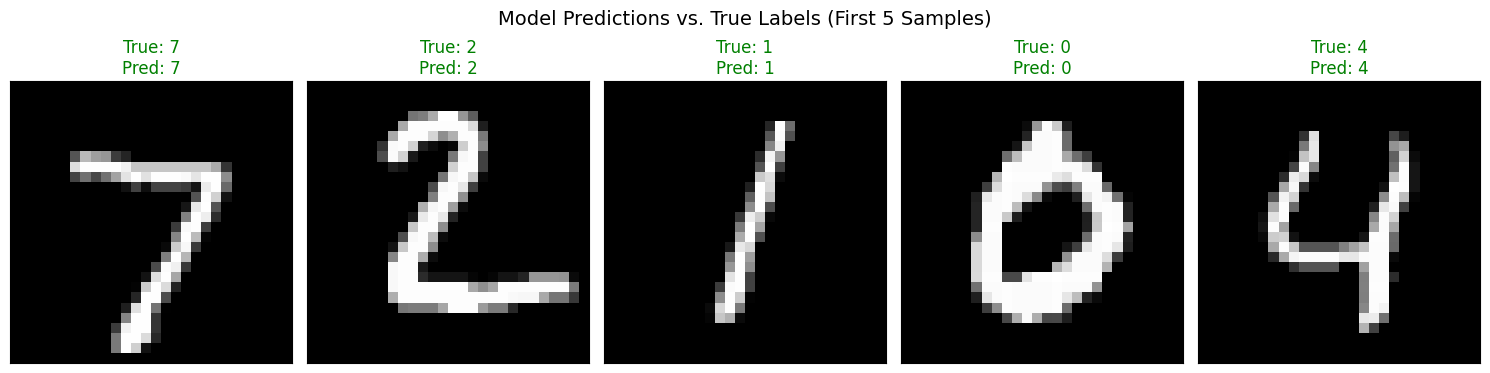

In [29]:
num_samples_to_show = 5
indices_to_show = np.arange(num_samples_to_show) # Get the first 5 indices

fig, axes = plt.subplots(1, num_samples_to_show, figsize=(15, 4))
plt.suptitle(f"Model Predictions vs. True Labels (First {num_samples_to_show} Samples)", fontsize=14)

for i, idx in enumerate(indices_to_show):
    image, true_label = test_dataset[idx]

    predicted_label = test_predictions[idx].item()
    is_correct = (predicted_label == true_label)
    color = "green" if is_correct else "red"
    axes[i].imshow(image.squeeze().numpy(), cmap="gray") 
    title_text = f"True: {true_label}\nPred: {predicted_label}"
    axes[i].set_title(title_text, color=color, fontsize=12)
    axes[i].set_xticks([])
    axes[i].set_yticks([])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 9. Побудуйте матрицю плутанини, порівнюючи передбачення вашої моделі з істинними мітками.

In [33]:
# Convert Tensors to NumPy arrays for Scikit-learn
y_true = test_true_labels.numpy()
y_pred = test_predictions.numpy()
mnist_classes = list(range(10)) # [0, 1, ..., 9]

cm = confusion_matrix(y_true, y_pred)

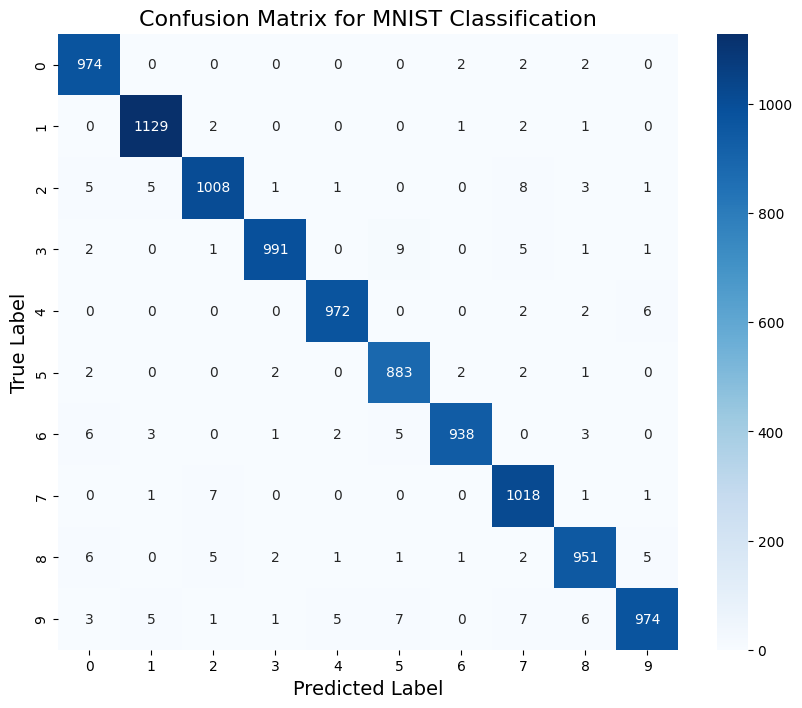

In [34]:
# --- 3. Visualize the Confusion Matrix ---
plt.figure(figsize=(10, 8))
# Use Seaborn to plot the heatmap
sns.heatmap(
    cm, 
    annot=True, 
    fmt="d", # 'd' formats the numbers as integers
    cmap="Blues", 
    xticklabels=mnist_classes, 
    yticklabels=mnist_classes
)
plt.title("Confusion Matrix for MNIST Classification", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.show()

## 10. Виведіть принаймні 9 прикладів, де модель помиляється, разом з тим, якою мала бути мітка зображення.
* Після візуалізації цих прогнозів, як ви думаєте, це більше помилка моделювання чи помилка даних?
* Тобто, чи може модель працювати краще, чи мітки даних занадто близькі одна до одної, що навіть людина не може чітко розрізнити що це за цифра?

In [35]:
misclassified_mask = test_predictions != test_true_labels

# Get the indices of the misclassified samples
misclassified_indices = torch.where(misclassified_mask)[0]
num_errors_to_show = 9
if len(misclassified_indices) < num_errors_to_show:
    num_errors_to_show = len(misclassified_indices)
    print(f"Only {num_errors_to_show} errors found.")

sample_indices = misclassified_indices[:num_errors_to_show]

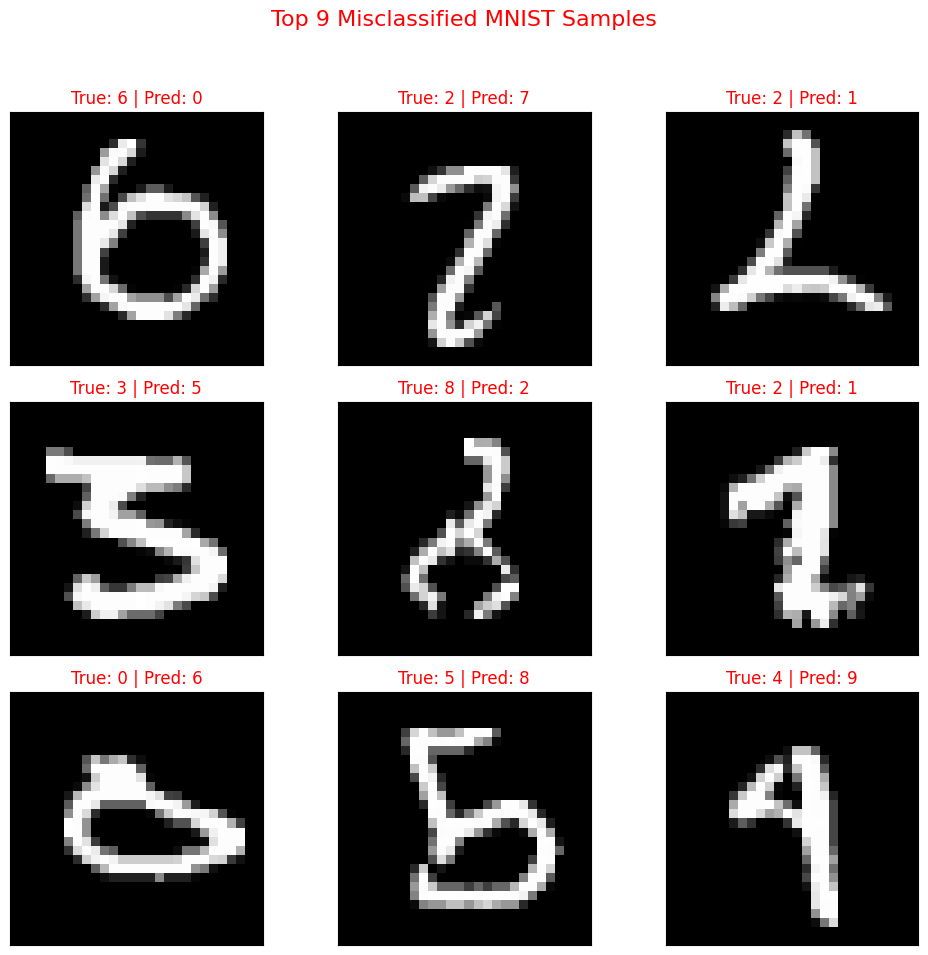

In [36]:
rows = 3
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
plt.suptitle(f"Top {num_errors_to_show} Misclassified MNIST Samples", fontsize=16, color='red')

for i, ax in enumerate(axes.flat):
    if i >= num_errors_to_show:
        ax.axis('off')
        continue

    idx = sample_indices[i].item()
    
    image, _ = test_dataset[idx]
    true_label = test_true_labels[idx].item()
    predicted_label = test_predictions[idx].item()
    
    ax.imshow(image.squeeze().numpy(), cmap="gray")

    title_text = f"True: {true_label} | Pred: {predicted_label}"
    ax.set_title(title_text, color='red', fontsize=12)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 11. Створіть випадковий тензор форми `[1, 3, 64, 64]` і пропустіть його через шар `nn.Conv2d()` з різними налаштуваннями гіперпараметрів (ви можете вибрати будь-які налаштування), що ви помічаєте, якщо параметр `kernel_size` збільшується або зменшується?

In [37]:
INPUT_SHAPE = (1, 3, 64, 64) # [Batch Size, Channels, Height, Width]
OUT_CHANNELS = 10           # Number of filters (feature maps)

input_tensor = torch.randn(INPUT_SHAPE)
print(f"Input Tensor Shape: {input_tensor.shape}")

Input Tensor Shape: torch.Size([1, 3, 64, 64])


In [38]:
def run_conv_test(kernel_k):
    """Creates and runs nn.Conv2d with the specified kernel size."""
    # We fix padding=0 and stride=1 for clear spatial size changes
    conv_layer = nn.Conv2d(
        in_channels=INPUT_SHAPE[1],
        out_channels=OUT_CHANNELS,
        kernel_size=kernel_k,
        stride=1,
        padding=0
    )
    output_tensor = conv_layer(input_tensor)
    return output_tensor.shape



In [39]:
shape_k3 = run_conv_test(3)
shape_k7 = run_conv_test(7)
shape_k15 = run_conv_test(15)

print(f"Kernel Size 3: Output Shape: {shape_k3}")
print(f"Kernel Size 7: Output Shape: {shape_k7}")
print(f"Kernel Size 15: Output Shape: {shape_k15}")

Kernel Size 3: Output Shape: torch.Size([1, 10, 62, 62])
Kernel Size 7: Output Shape: torch.Size([1, 10, 58, 58])
Kernel Size 15: Output Shape: torch.Size([1, 10, 50, 50])
